<a href="https://colab.research.google.com/github/heyroha/DataScience/blob/main/%EA%B3%B5%EA%B8%B0%EC%A7%88_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EA%B3%A0%EA%B0%9D_%EB%A6%AC%ED%8F%AC%ED%8A%B8_%EA%B8%B0%ED%9A%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 02**  
**┗ 공기질 데이터 분석 및 고객 리포트 기획**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「공기질 데이터 Trend 파악」
* 🥈Session 2 - 「고객 리포트 기획을 위한 지표 정의」
* 🥇Session 3 - 「고객 리포트 Story line 구성」

In [35]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/FASTCAMPUS/직장인 초격차/Part.3. 다양한 실무 데이터를 활용하여 실습하기 강의자료 및 부가자료/강의자료_최종본/part3_lecture_fastcampus/chapter02_ 공기질 데이터 분석 및 고객 리포트 기획/chapter02_airquality.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🌏 (서비스기획자, 마케터, 필드 데이터 분석가)

```
A업체는 공기질 센서 측정기를 개발하여 판매하고 있다. 업계에 선두 주자 였으나 다양한 경쟁사가 등장하면서 판매량이 감소하고 있는 상황이다.  
단순히 제품 판매로만 영업이익을 발생시킬 수 없다고 판단하여, 새로운 서비스를 고객에게 제공하여 판매 촉진을 달성하려고 한다. 공기질 센서  
측정기로부터 수집되는 센서 데이터를 활용하여 고객에게 무상으로 '우리집 공기질 Report'제공하여 타 경쟁사 대비 우위를 선점하려고 한다.
```  


> **데이터 살펴보기**

* 일자별 시간 단위로 공기질 측정기에서 총 13개의 센서 데이터가 수집된다.
* 데이터 명세 ⬇

|Date|Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|PT08.S4(NO2)|PT08.S5(O3)|T|RH|AH|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|날짜|시간|일산화탄소|산화주석|비메타닉 탄화수소|벤젠농도|티타니아|Nox농도|산화 텅스텐(Nox)|NO2농도|산화 텅스텐(No2)|산화인듐|온도|상대습도|절대습도|

In [37]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 제품 판매량 감소, 영업이익 감소
```  

> **기대효과**

```
▶ 제품 판매량 증가, 영업이익 증가
```

> **해결방안**

```
▶ 공기질 고객 Report 제공을 통해 경쟁사 대비 차별화 서비스 제공
▶ Session 1 🥉
 - 공기질 데이터에 대한 이해 + Time data 처리 방법
▶ Session 2 🥈
 - Report 작성을 위한 다양한 지표 개발
▶ Session 3 🥇
 - 개발된 지표를 활용하여 고객 Report 개발
```

> **성과측정**  

```
▶ Report 제공 전/후 판매량 비교, 설문조사를 통한 고객만족도 점수화
```

> **현업적용**  

```
▶ 공기질 측정기로 부터 실시간 센서 데이터 수집 및 DB 적재 시스템 구축  
▶ 수집된 센서 데이터 활용 고객 Report 대시보드 개발  
▶ 매 월 고객별 Report 출력 및 전송채널(e-mail, Kakao takl 등)을 통해 제공
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → replace(), to_datetime(), astype(str)
▶ session 2 → sns.distplot(), plt.axvline(), value_counts()
▶ session 3 → unique(), dt.hour(), plt.xticks
```

## **🥉Session 1**  
**┗ 공기질 데이터 Trend 파악**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [38]:
data.shape

(9357, 15)

In [39]:
#time 의 경우 objct로 나와있기 때문에 datetime으로 변환시켜줘야함.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [40]:
#null값 존재하지 않음.

data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [41]:
#Outlier 확인,음수값 확인
#모든 데이터 센서에서 min값이 -200으로 관찰됨.

data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [42]:
df = data

In [43]:
#센서 값이 음수인 data확인
#정상적인 센서값에서 나올 수 있는 수치가 아니기 때문에 전처리가 필요함.

df[df['T'] == -200].head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,2004-04-01,14:00:00,1.7,-200.0,222,-200.0,-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200.0,-200.0,-200.0
525,2004-04-01,15:00:00,1.9,-200.0,197,-200.0,-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200.0,-200.0,-200.0
526,2004-04-01,16:00:00,2.3,-200.0,319,-200.0,-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200.0,-200.0,-200.0
701,2004-04-08,23:00:00,2.0,-200.0,137,-200.0,-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200.0,-200.0,-200.0
702,2004-04-09,00:00:00,2.4,-200.0,189,-200.0,-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [44]:
#-200이라는 값은 먼저 null값으로 대체후, f-fill을 통해 이전 sensor 값으로 치환.
import numpy as np

df = df.replace(-200,np.NaN)
df = df.fillna(method = 'ffill')

### · Data 전처리(Time data)  
---
* Time(시간) 데이터 다뤄보기


In [45]:
# ▶ 시간 데이터가 'Data'와 'Time'으로 나뉘어 있기 때문에 둘을 합친 하나의 새로운 col을 생성
# ▶ 데이터를 병합하기 위해서는 문자열(str)형태로만 가능하기 때문에 형변환 후 병합 수행
# ▶ 병합한 시간 데이터를 최종 Date time으로 변환하는 것으로 종료
import datetime

df['Date_merge'] = df['Date'].astype('str') + ' ' + df['Time'].astype(str)
df['Date_merge'] = pd.to_datetime(df['Date_merge'])
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_merge
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [46]:
#데이터 컬럼 순서 바꾸기

df = df[['Date_merge','Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']]
df.head()

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_merge     9357 non-null   datetime64[ns]
 1   Date           9357 non-null   datetime64[ns]
 2   Time           9357 non-null   object        
 3   CO(GT)         9357 non-null   float64       
 4   PT08.S1(CO)    9357 non-null   float64       
 5   NMHC(GT)       9357 non-null   float64       
 6   C6H6(GT)       9357 non-null   float64       
 7   PT08.S2(NMHC)  9357 non-null   float64       
 8   NOx(GT)        9357 non-null   float64       
 9   PT08.S3(NOx)   9357 non-null   float64       
 10  NO2(GT)        9357 non-null   float64       
 11  PT08.S4(NO2)   9357 non-null   float64       
 12  PT08.S5(O3)    9357 non-null   float64       
 13  T              9357 non-null   float64       
 14  RH             9357 non-null   float64       
 15  AH             9357 n

### · 공기질 Trend 파악  
---
* 시간에 따라서 변화하는 센서 데이터의 Trend(추이)를 파악
* matplotlib.pyplot / seaborn 사용법

In [48]:
!pip install koreanize-matplotlib

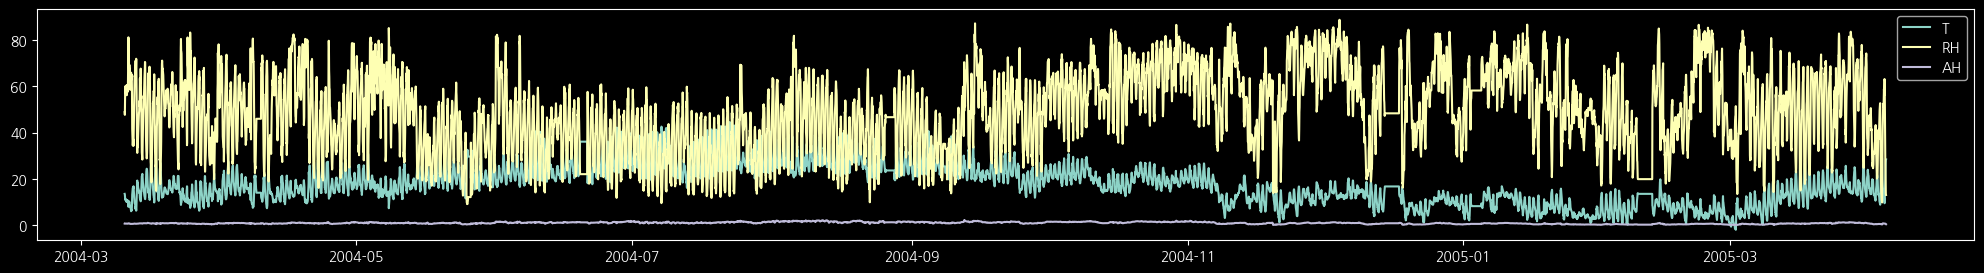

In [50]:
#RH상대 습도

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date_merge'], df['T'],label = 'T')
plt.plot(df['Date_merge'], df['RH'], label = 'RH')
plt.plot(df['Date_merge'], df['AH'], label = 'AH')

plt.legend()
plt.gcf().set_size_inches(25,3)

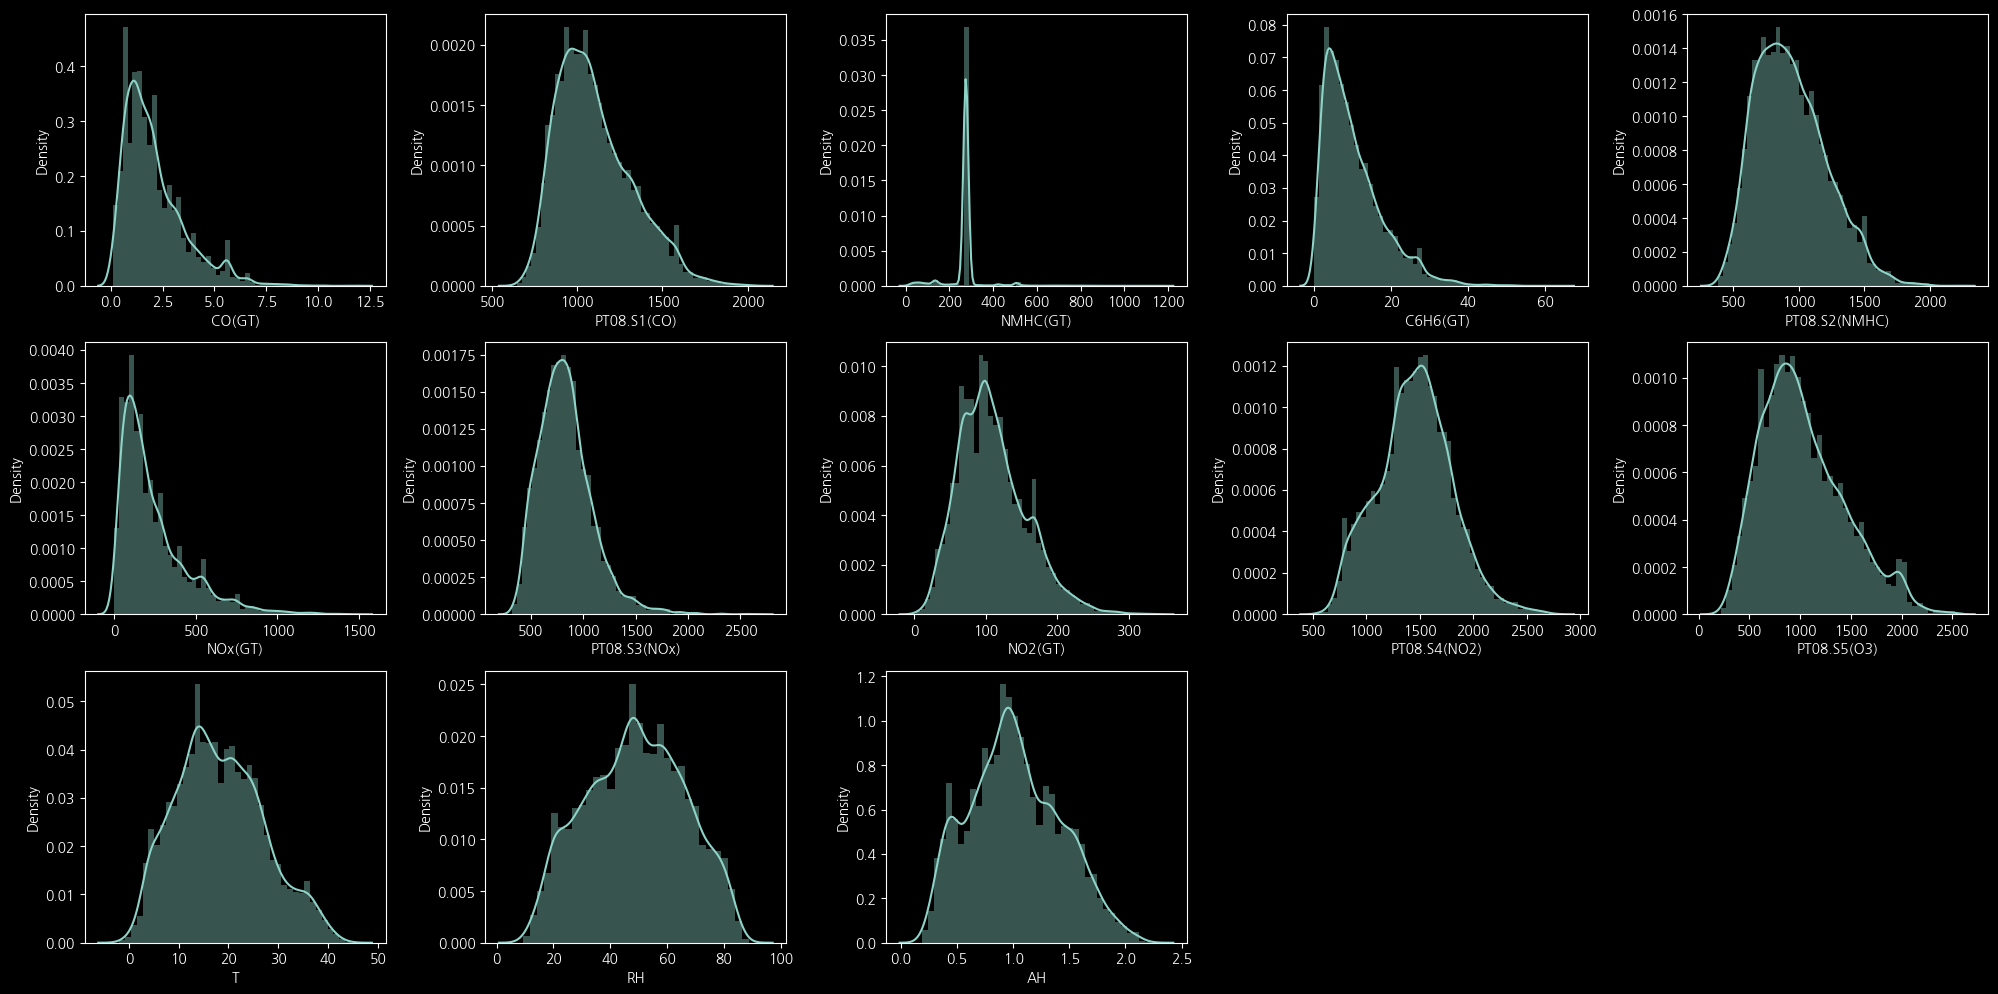

In [53]:
#모든 센서 데이터에 대한 분포 확인

for i in range(3,16):
  plt.subplot(3,5,i-2)
  plt.grid(False)
  sns.distplot(df.iloc[:,i])

plt.gcf().set_size_inches(20,10)
plt.tight_layout() #그래프 빈 공간들 좀 없애주는 옵
plt.show()

## **🥈Session 2**  
**┗ 고객 리포트 기획을 위한 지표 정의**  
---


### · 지표 정의 (기준치 설정)
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down


In [56]:
for i in range(3,16):
  print(df.columns[i],'▶','Min:', df.iloc[:,i].min(),'Max : ', df.iloc[:,i].max(), 'Average :', df.iloc[:,i].mean())

CO(GT) ▶ Min: 0.1 Max :  11.9 Average : 2.082195148017527
PT08.S1(CO) ▶ Min: 647.25 Max :  2039.75 Average : 1102.6043959958677
NMHC(GT) ▶ Min: 7.0 Max :  1189.0 Average : 270.4967404082505
C6H6(GT) ▶ Min: 0.14904773883376646 Max :  63.74147644829163 Average : 10.190298936251601
PT08.S2(NMHC) ▶ Min: 383.25 Max :  2214.0 Average : 942.4227405507462
NOx(GT) ▶ Min: 2.0 Max :  1479.0 Average : 240.71814684193654
PT08.S3(NOx) ▶ Min: 322.0 Max :  2682.75 Average : 832.6185387054255
NO2(GT) ▶ Min: 2.0 Max :  339.7 Average : 109.40145345730468
PT08.S4(NO2) ▶ Min: 551.0 Max :  2775.0 Average : 1452.8903583769725
PT08.S5(O3) ▶ Min: 221.0 Max :  2522.75 Average : 1030.3884257774928
T ▶ Min: -1.8999999761581 Max :  44.60000038147 Average : 18.315768049064744
RH ▶ Min: 9.1750001907349 Max :  88.72500038147 Average : 48.814852540627456
AH ▶ Min: 0.1846790209991702 Max :  2.2310357155831864 Average : 1.017381945032572


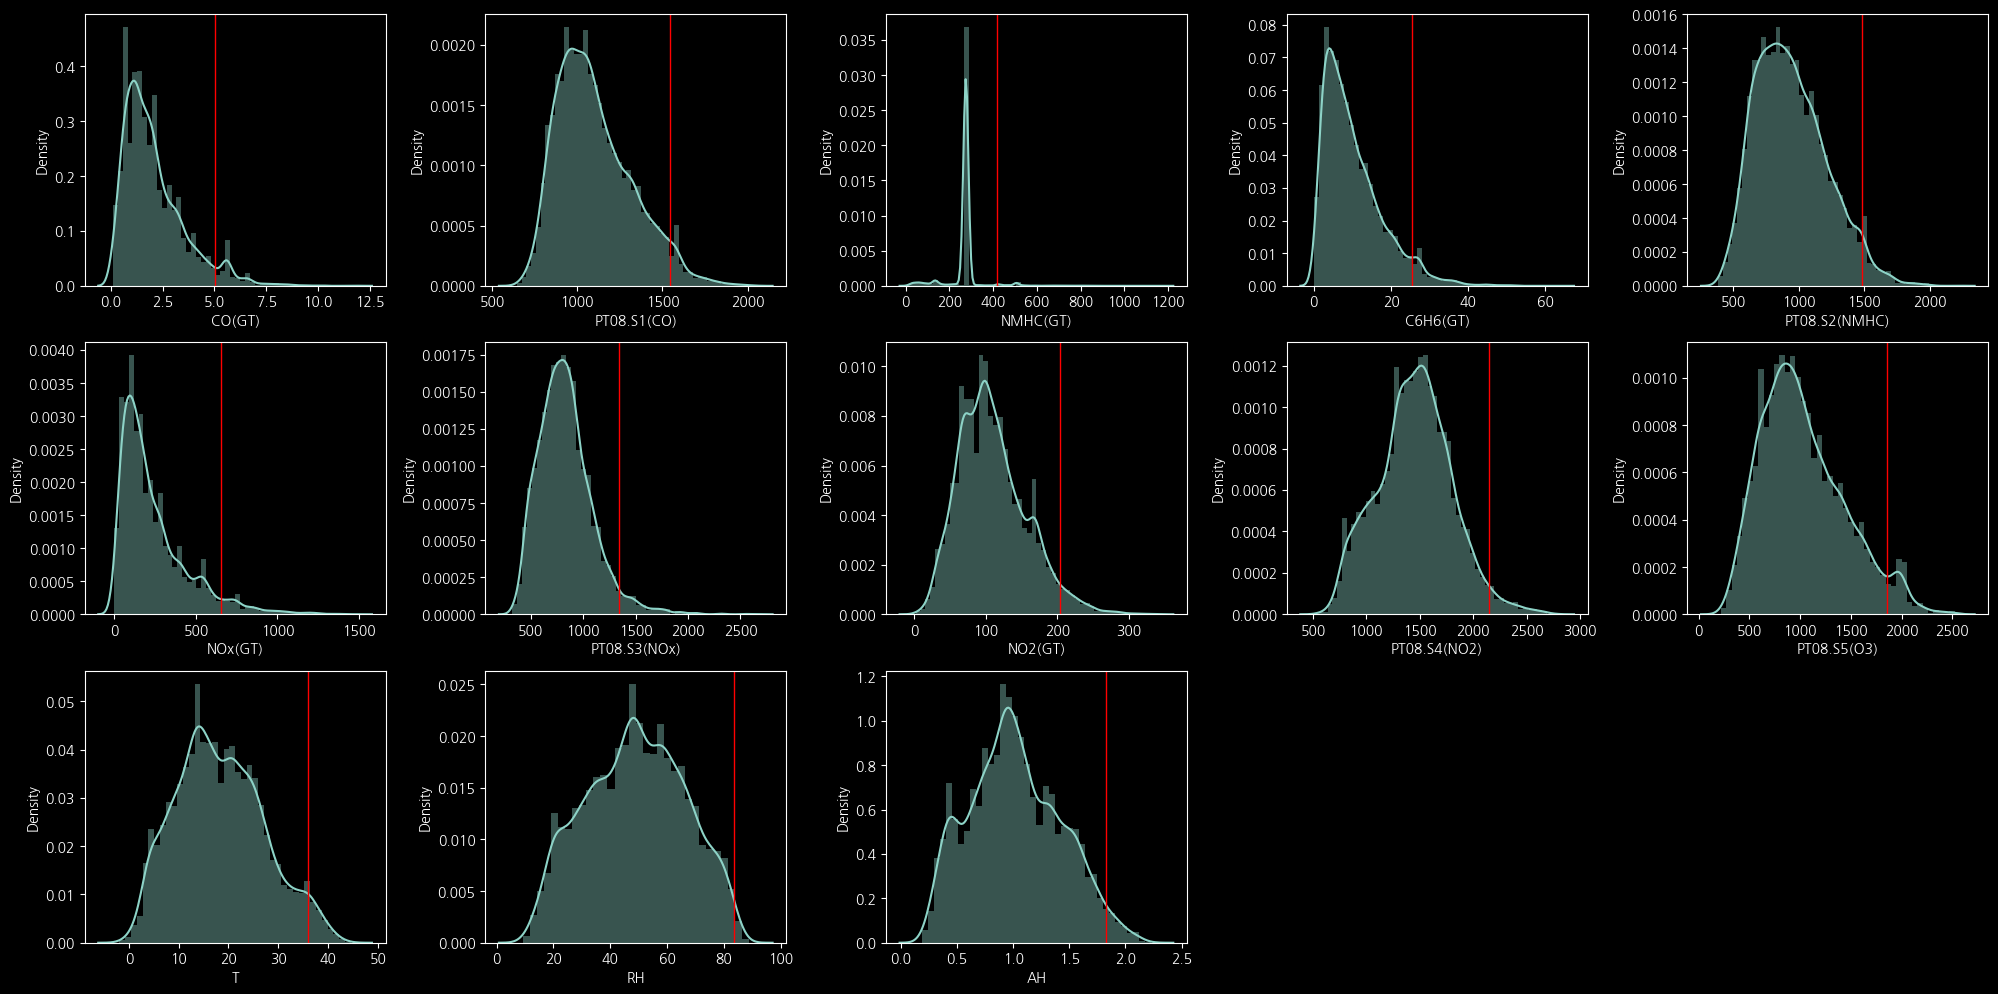

In [58]:
# ▶ Sensor data의 기준치를 설정
# ▶ T, RH, AH를 제외한 센서값에 대해서는 평균 대비 2sd(표준편차)가 넘어가게 되면 "기준치 초과"로 설정

for i in range(3,16):
  plt.subplot(3,5,i-2)
  plt.grid(False)
  sns.distplot(df.iloc[:,i])
  plt.axvline(df.iloc[:,i].mean() + 2*df.iloc[:,i].std(), color ='r', linewidth = 1)


plt.gcf().set_size_inches(20,10)
plt.tight_layout()
plt.show()

### · 지표 정의 (취약 시간대 탐색)  
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down


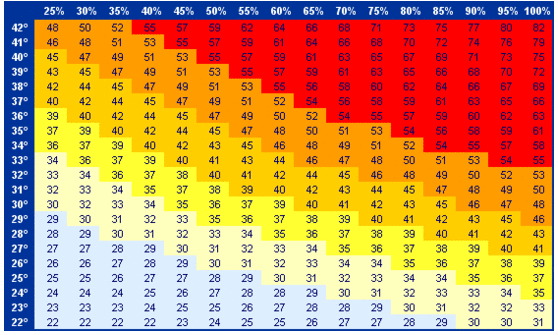

In [60]:
from IPython.display import Image
Image('/content/drive/MyDrive/FASTCAMPUS/직장인 초격차/Part.3. 다양한 실무 데이터를 활용하여 실습하기 강의자료 및 부가자료/강의자료_최종본/part3_lecture_fastcampus/chapter02_ 공기질 데이터 분석 및 고객 리포트 기획/img1.PNG')

In [63]:
#온도 취약 시간대 탐색(1) - 일 Day
df[df['T']> 35]['Date'].value_counts().head()

2004-06-20    24
2004-06-19    11
2004-07-21     9
2004-07-22     9
2004-07-23     9
Name: Date, dtype: int64

In [68]:
df['Month'] = df['Date_merge'].dt.month
df

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,3
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,3
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,3
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,3
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,2005-04-04,10:00:00,3.1,1314.25,275.0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,4
9353,2005-04-04 11:00:00,2005-04-04,11:00:00,2.4,1162.50,275.0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,4
9354,2005-04-04 12:00:00,2005-04-04,12:00:00,2.4,1142.00,275.0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,4
9355,2005-04-04 13:00:00,2005-04-04,13:00:00,2.1,1002.50,275.0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,4


In [69]:
#온도 취약 시간대 탐색(2) - 월 Month

df[df['T']>35]['Month'].value_counts()

7    166
8    129
6    121
9     28
Name: Month, dtype: int64

In [71]:
#온도 취약 시간대 탐색(3) - 시간 Hour
df[df['T']>35]['Time'].value_counts().head()

16:00:00    68
15:00:00    64
17:00:00    59
13:00:00    56
14:00:00    52
Name: Time, dtype: int64

In [74]:
#습도가 60도 이상일때 불쾌지수가 높다고 가정
#습도 취약 시간대 탐색(1) - 일 Day
df[df['RH']> 60]['Date'].value_counts().head(10)

2004-11-28    24
2004-11-23    24
2004-12-05    24
2005-01-10    24
2004-12-04    24
2004-12-03    24
2004-12-01    24
2004-11-27    24
2005-02-21    24
2004-11-11    24
Name: Date, dtype: int64

In [76]:
#습도 취약 시간대 탐색(2) - 월 Month
df[df['RH']> 60]['Month'].value_counts().head()

10    446
3     393
11    366
12    335
1     291
Name: Month, dtype: int64

In [77]:
#습도 취약 시간대 탐색(3) - 시간 Hour
df[df['RH']> 60]['Time'].value_counts().head(5)

06:00:00    203
05:00:00    199
04:00:00    197
07:00:00    196
03:00:00    181
Name: Time, dtype: int64

### · 지표 정의 (상쾌 시간대 탐색)  
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down


In [86]:
# ▶ 온도(T) : 25~27 / 습도(RH) : 35~40, 상쾌구간 정의
df_good = df[((df['T'] >= 25) & (df['T'] <= 27)) & ((df['RH'] >= 35 ) & (df['RH'] <= 40))]
df_good.head()

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
1077,2004-04-24 15:00:00,2004-04-24,15:00:00,1.7,1222.50,192.0,8.953194,937.50,91.0,883.50,89.0,1610.00,879.50,25.550000,36.049999,1.162886,4
1609,2004-05-16 19:00:00,2004-05-16,19:00:00,2.7,1403.25,275.0,15.060586,1150.50,147.0,747.00,125.0,1820.25,1124.75,25.475000,37.350000,1.199513,5
1751,2004-05-22 17:00:00,2004-05-22,17:00:00,2.8,1466.25,275.0,15.807518,1173.75,152.0,680.00,115.0,1964.75,1301.50,25.450000,39.825000,1.277117,5
1777,2004-05-23 19:00:00,2004-05-23,19:00:00,1.1,1085.25,275.0,5.849489,804.75,69.0,972.25,65.0,1528.25,717.75,25.275001,36.275000,1.151340,5
2081,2004-06-05 11:00:00,2004-06-05,11:00:00,1.1,883.00,275.0,5.287938,777.75,61.0,1129.50,57.0,1544.50,607.50,25.875000,36.900000,1.213267,6


In [87]:
# ▶ 온도(T) : 25~27 / 습도(RH) : 35~40, 상쾌구간 정의
df_good['T'].mean(), df_good['RH'].mean()

(25.843192474383184, 36.9990611344995)

In [89]:
#상쾌한 날 Date
df_good['Date'].value_counts().head()

2004-09-08    9
2004-09-05    4
2004-09-06    4
2004-07-08    3
2004-06-14    3
Name: Date, dtype: int64

In [92]:
#상쾌한 날 Month
df_good['Month'].value_counts().head()

9    25
6    17
7    15
8     9
5     3
Name: Month, dtype: int64

In [91]:
#상쾌한 날 Hour
df_good['Time'].value_counts().head()

09:00:00    10
22:00:00     9
21:00:00     5
07:00:00     5
19:00:00     5
Name: Time, dtype: int64

### · 지표 정의 (환기  시간대 탐색)  
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down
